Enter date here (DD-MM-YYYY) : 14-12-2023
Enter nifty_500 value : 18973.85


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_2480\438902571.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data, ignore_index=True)


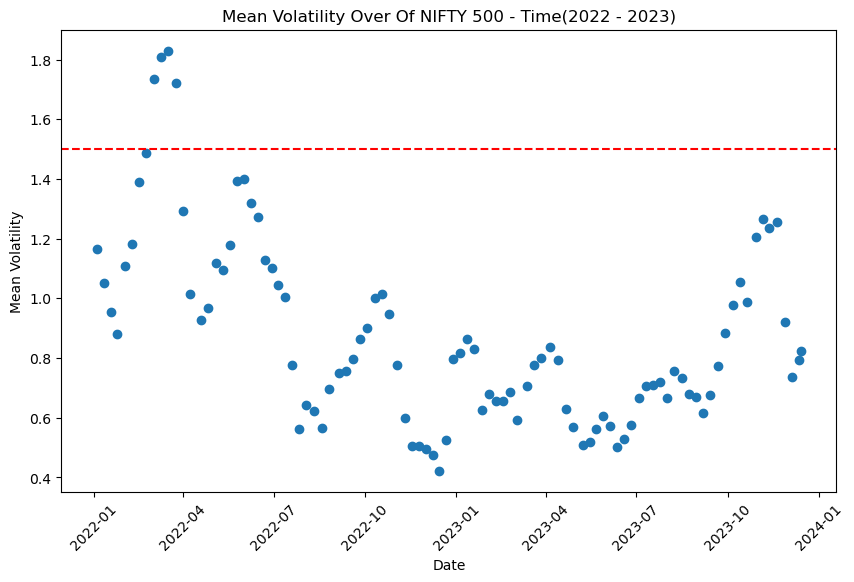

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Function to calculate rolling volatility
def calculate_volatility(returns_series, window_size):
    # Calculate the rolling standard deviation of returns
    return returns_series.rolling(window=window_size).std()



# Function to calculate mean volatility for each group of 5 rows
def calculate_mean_volatility(df):
    df['Group'] = df.index // 5
    group_means = df.groupby('Group')['volatility_ratio'].mean()
    df['mean_Volatility'] = np.nan

    for group in df['Group'].unique():
        last_row_index = df[df['Group'] == group].index[-1]
        df.at[last_row_index, 'mean_Volatility'] = group_means[group]
    
    return df

# Function to update the DataFrame with new entry
def update_dataframe(df, new_date, new_nifty_price):
    # Ensure the date column is sorted
    df.sort_values('date', inplace=True)
    
    # Calculate the daily return for the new price
    last_price = df.iloc[-1]['nifty500']
    daily_return = (new_nifty_price - last_price) / last_price
    
    # Append the new data to the DataFrame
    new_data = {
        'date': pd.to_datetime(new_date, format='%d-%m-%Y'),  # parsing the date string into a datetime object
        'nifty500': new_nifty_price,
        'daily_return': daily_return,
        'volatility_21_days': None,  # to be calculated
        'volatility_252_days': None,  # to be calculated
        'volatility_ratio': None  # to be calculated
    }
    df = df.append(new_data, ignore_index=True)
    
    # Calculate the rolling 21-day and 250-day volatilities
    df['volatility_21_days'] = calculate_volatility(df['daily_return'], 21)
    df['volatility_252_days'] = calculate_volatility(df['daily_return'], 252)
    
    # Calculate the ratio of the 21-day volatility to the 250-day volatility
    df['volatility_ratio'] = df['volatility_21_days'] / df['volatility_252_days']
    
    return df


new_date = input("Enter date here (DD-MM-YYYY) : ")
new_nifty_price = float(input("Enter nifty_500 value : " )) 

# Load your CSV file into a DataFrame
df = pd.read_csv("nifty_500_volatility.csv",parse_dates=['date'], dayfirst=True)

# Update DataFrame with new data
updated_df = update_dataframe(df, new_date, new_nifty_price)

# Calculate mean volatility for each group of 5 rows
updated_df = calculate_mean_volatility(updated_df)


updated_df.to_csv('nifty_500_volatility.csv', index=False)


updated_df_2022 = updated_df[updated_df['date'].dt.year >= 2022]


plt.figure(figsize=(10, 6))
plt.plot(updated_df_2022['date'], updated_df_2022['mean_Volatility'],marker = "o",linestyle='' )
plt.axhline(y=1.5, color='r', linestyle='--')
plt.title('Mean Volatility Over Of NIFTY 500 - Time(2022 - 2023)')
plt.xlabel('Date')
plt.ylabel('Mean Volatility')
plt.xticks(rotation=45)  


plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate rolling volatility
def calculate_volatility(returns_series, window_size):
    return returns_series.rolling(window=window_size).std()

# Function to calculate mean volatility for each group of 5 rows
def calculate_mean_volatility(df):
    df['Group'] = df.index // 5
    group_means = df.groupby('Group')['volatility_ratio'].mean()
    df['mean_Volatility'] = np.nan

    for group in df['Group'].unique():
        last_row_index = df[df['Group'] == group].index[-1]
        df.at[last_row_index, 'mean_Volatility'] = group_means[group]
    
    return df

# Function to update the DataFrame with new entry
def update_dataframe(df, new_date, new_nifty_price):
    df.sort_values('date', inplace=True)
    
    last_price = df.iloc[-1]['nifty200']
    daily_return = (new_nifty_price - last_price) / last_price
    
    new_data = {
        'date': pd.to_datetime(new_date),  # Automatically parses to YYYY-MM-DD format
        'nifty200': new_nifty_price,
        'daily_return': daily_return,
        'volatility_21_days': None,
        'volatility_252_days': None,
        'volatility_ratio': None
    }
    df = df.append(new_data, ignore_index=True)
    
    df['volatility_21_days'] = calculate_volatility(df['daily_return'], 21)
    df['volatility_252_days'] = calculate_volatility(df['daily_return'], 252)
    df['volatility_ratio'] = df['volatility_21_days'] / df['volatility_252_days']
    
    return df

# Example usage - After updating the DataFrame with new data
new_date = input("Enter date here (YYYY-MM-DD) : ")
new_nifty_price = float(input("Enter NIFTY 200 value : ")) 

# Load your CSV file into a DataFrame
df = pd.read_csv("nifty200_new.csv", parse_dates=['date'])

# Update DataFrame with new data
updated_df = update_dataframe(df, new_date, new_nifty_price)

# Calculate mean volatility for each group of 5 rows
updated_df = calculate_mean_volatility(updated_df)

# Save the updated DataFrame
updated_df.to_csv('nifty200_new.csv', index=False)

# Filter for data from 2022 onwards
updated_df_2022 = updated_df[updated_df['date'].dt.year >= 2022]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(updated_df_2022['date'], updated_df_2022['mean_Volatility'], marker='o')  # Line graph with markers
plt.axhline(y=1.5, color='r', linestyle='--')
plt.title('Mean Volatility Over Of NIFTY 200 - Time(2022 - 2023)')
plt.xlabel('Date')
plt.ylabel('Mean Volatility')
plt.xticks(rotation=45)
plt.show()


KeyboardInterrupt: Interrupted by user

In [4]:
df = pd.read_csv("nifty_200_volatility.csv", parse_dates=['date'])

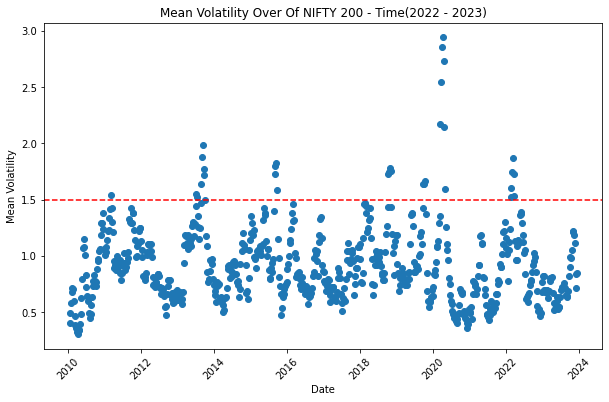

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['mean_Volatility'],marker='o')  # Line graph with markers
plt.axhline(y=1.5, color='r', linestyle='--')
plt.title('Mean Volatility Over Of NIFTY 200 - Time(2022 - 2023)')
plt.xlabel('Date')
plt.ylabel('Mean Volatility')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate rolling volatility
def calculate_volatility(returns_series, window_size):
    return returns_series.rolling(window=window_size).std()

# Function to calculate mean volatility for each group of 5 rows
def calculate_mean_volatility(df):
    df['Group'] = df.index // 5
    group_means = df.groupby('Group')['volatility_ratio'].mean()
    df['mean_Volatility'] = np.nan

    for group in df['Group'].unique():
        last_row_index = df[df['Group'] == group].index[-1]
        df.at[last_row_index, 'mean_Volatility'] = group_means[group]
    
    return df

# Function to update the DataFrame with new entry
def update_dataframe(df, new_date, new_nifty_price):
    df.sort_values('date', inplace=True)
    
    last_price = df.iloc[-1]['nifty500']
    daily_return = (new_nifty_price - last_price) / last_price
    
    new_data = {
        'date': pd.to_datetime(new_date),  # Automatically parses to YYYY-MM-DD format
        'nifty500': new_nifty_price,
        'daily_return': daily_return,
        'volatility_21_days': None,
        'volatility_252_days': None,
        'volatility_ratio': None
    }
    df = df.append(new_data, ignore_index=True)
    
    df['volatility_21_days'] = calculate_volatility(df['daily_return'], 21)
    df['volatility_252_days'] = calculate_volatility(df['daily_return'], 252)
    df['volatility_ratio'] = df['volatility_21_days'] / df['volatility_252_days']
    
    return df

# Example usage - After updating the DataFrame with new data
new_date = input("Enter date here (YYYY-MM-DD) : ")
new_nifty_price = float(input("Enter NIFTY 500 value : ")) 

# Load your CSV file into a DataFrame
df = pd.read_csv("nifty_500_volatility.csv", parse_dates=['date'])

# Update DataFrame with new data
updated_df = update_dataframe(df, new_date, new_nifty_price)

# Calculate mean volatility for each group of 5 rows
updated_df = calculate_mean_volatility(updated_df)

# Save the updated DataFrame
updated_df.to_csv('nifty_500_volatility.csv', index=False)

# Filter for data from 2022 onwards
updated_df_2022 = updated_df[updated_df['date'].dt.year >= 2022]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(updated_df_2022['date'], updated_df_2022['mean_Volatility'], marker='o')  # Line graph with markers
plt.axhline(y=1.5, color='r', linestyle='--')
plt.title('Mean Volatility Over Of NIFTY 500 - Time(2022 - 2023)')
plt.xlabel('Date')
plt.ylabel('Mean Volatility')
plt.xticks(rotation=45)
plt.show()


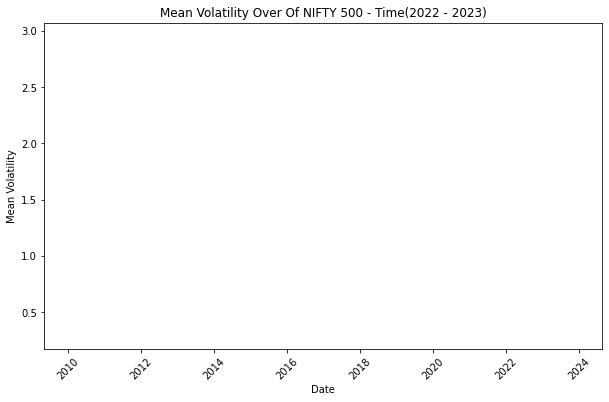

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['mean_Volatility'])  # Simple line graph
plt.axhline(y=1.5, color='r', linestyle='--')
plt.title('Mean Volatility Over Of NIFTY 500 - Time(2022 - 2023)')
plt.xlabel('Date')
plt.ylabel('Mean Volatility')
plt.xticks(rotation=45)
plt.show()


In [16]:
df

,date,nifty200,daily_return,volatility_21_days,volatility_252_days,volatility_ratio,Group,mean_Volatility
0,2009-01-01,1519.21,NaN,NaN,NaN,NaN,0,NaN
1,2009-01-02,1530.76,0.007603,NaN,NaN,NaN,0,NaN
2,2009-01-05,1566.34,0.023243,NaN,NaN,NaN,0,NaN
3,2009-01-06,1563.66,-0.001711,NaN,NaN,NaN,0,NaN
4,2009-01-07,1466.21,-0.062322,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...
3699,2023-12-08,11358.80,0.000912,0.005287,0.006311,0.837774,739,0.835069
3700,2023-12-11,11396.50,0.003319,0.005105,0.006313,0.808588,740,NaN
3701,2023-12-12,11342.55,-0.004734,0.005452,0.006319,0.862849,740,NaN
3702,2023-12-13,11376.70,0.003011,0.005446,0.006314,0.862436,740,NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Function to calculate rolling volatility
def calculate_volatility(returns_series, window_size):
    # Calculate the rolling standard deviation of returns
    return returns_series.rolling(window=window_size).std()



# Function to calculate mean volatility for each group of 5 rows
def calculate_mean_volatility(df):
    df['Group'] = df.index // 5
    group_means = df.groupby('Group')['volatility_ratio'].mean()
    df['mean_Volatility'] = np.nan

    for group in df['Group'].unique():
        last_row_index = df[df['Group'] == group].index[-1]
        df.at[last_row_index, 'mean_Volatility'] = group_means[group]
    
    return df

# Function to update the DataFrame with new entry
def update_dataframe(df, new_date, new_nifty_price):
    # Ensure the date column is sorted
    df.sort_values('date', inplace=True)
    
    # Calculate the daily return for the new price
    last_price = df.iloc[-1]['nifty500']
    daily_return = (new_nifty_price - last_price) / last_price
    
    # Append the new data to the DataFrame
    new_data = {
        'date': pd.to_datetime(new_date, format='%d-%m-%Y'),  # parsing the date string into a datetime object
        'nifty500': new_nifty_price,
        'daily_return': daily_return,
        'volatility_21_days': None,  # to be calculated
        'volatility_252_days': None,  # to be calculated
        'volatility_ratio': None  # to be calculated
    }
    df = df.append(new_data, ignore_index=True)
    
    # Calculate the rolling 21-day and 250-day volatilities
    df['volatility_21_days'] = calculate_volatility(df['daily_return'], 21)
    df['volatility_252_days'] = calculate_volatility(df['daily_return'], 252)
    
    # Calculate the ratio of the 21-day volatility to the 250-day volatility
    df['volatility_ratio'] = df['volatility_21_days'] / df['volatility_252_days']
    
    return df


new_date = input("Enter date here (DD-MM-YYYY) : ")
new_nifty_price = float(input("Enter nifty_500 value : " )) 

# Load your CSV file into a DataFrame
df = pd.read_csv("nifty_500_volatility.csv",parse_dates=['date'], dayfirst=True)

# Update DataFrame with new data
updated_df = update_dataframe(df, new_date, new_nifty_price)

# Calculate mean volatility for each group of 5 rows
updated_df = calculate_mean_volatility(updated_df)


updated_df.to_csv('nifty_500_volatility.csv', index=False)

# Filtering out rows with missing 'mean_Volatility' values
updated_df = updated_df[updated_df_df['date'].dt.year >= 2022]
filtered_data = updated_df.dropna(subset=['mean_Volatility'])

# Plotting date against mean volatility for the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['mean_Volatility'], label='Mean Volatility', color='blue')
plt.axhline(y=1.5, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Volatility')
plt.title('Date vs Mean Volatility of Nifty 50 (Filtered)')
plt.legend()
plt.grid(True)
plt.show()





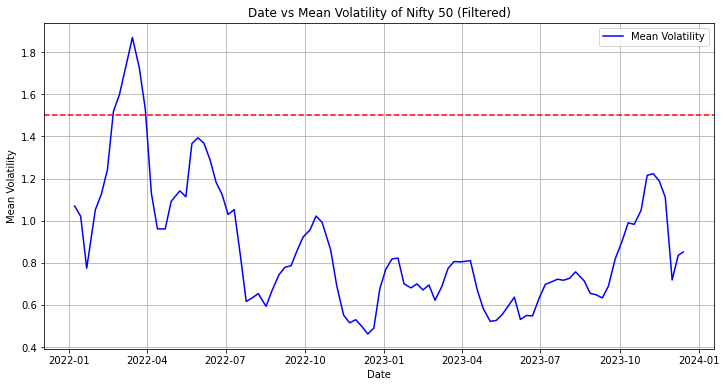

In [21]:
# Filtering out rows with missing 'mean_Volatility' values
updated_df = df[df['date'].dt.year >= 2022]
filtered_data = updated_df.dropna(subset=['mean_Volatility'])

# Plotting date against mean volatility for the filtered data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], filtered_data['mean_Volatility'], label='Mean Volatility', color='blue')
plt.axhline(y=1.5, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Volatility')
plt.title('Date vs Mean Volatility of Nifty 50 (Filtered)')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
#frontend
def volatility():
    def add_nifty50_entry(date, price):
        response = requests.post("http://127.0.0.1:8000/nifty50/add_entry/", json={"date": date, "price": price})
        return response

    def delete_nifty50_entry(date):
    # Sending a JSON object with the date
        response = requests.post("http://127.0.0.1:8000/nifty50/delete_entry/", json={"date": date})
        return response

    def plot_volatility():
        df = pd.read_csv("nifty_50_volatility.csv", parse_dates=['date'])
        updated_df = df[df['date'].dt.year >= 2022]
        filtered_data = updated_df.dropna(subset=['mean_Volatility'])
        plt.figure(figsize=(12, 6))
        plt.plot(filtered_data['date'], filtered_data['mean_Volatility'], label='Mean Volatility', color='blue')
        plt.axhline(y=1.5, color='r', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Mean Volatility')
        plt.title('NIFTY 50 Mean Volatility Over Time')
        plt.legend()
        plt.grid(True)
        st.pyplot(plt)
        
    st.title("NIFTY 50 Volatility Analysis")

    date_50_add = st.text_input("Enter Date for Adding NIFTY 50 Entry (YYYY-MM-DD)", key="date_50_add")
    price_50 = st.text_input("Enter NIFTY 50 Closing Price for Addition", key="price_50_add")
    
    if st.button("Add NIFTY 50 Entry"):
        response = add_nifty50_entry(date_50_add, price_50)
        if response.status_code == 200:
            response_data = response.json()
            if isinstance(response_data, list):
                st.success(response_data[0] if response_data else "Success!")
            else:
                st.success(response_data.get("message", "Success!"))
        else:
            st.error("Failed to add entry.")

    # Inside your main function or specific Streamlit page function
    date_50_delete = st.text_input("Enter Date for Deleting NIFTY 50 Entry (YYYY-MM-DD)", key="date_50_delete")
    if st.button("Delete NIFTY 50 Entry"):
        response = delete_nifty50_entry(date_50_delete)
        if response.status_code == 200:
            response_data = response.json()
            st.success(response_data.get("message", "Deleted successfully."))
        else:
            st.error("Failed to delete entry.")

    plot_volatility()

In [ ]:
#backend
#-----------------------------------------------------------------------------------------------------------------------------------------#
#Volatility code backend for nifty50,nifty200,nifty500







class Nifty50Entry(BaseModel):
    date: str
    price: float

def calculate_volatility(returns_series, window_size):
    return returns_series.rolling(window=window_size).std()

def calculate_mean_volatility(df):
    df['Group'] = df.index // 5
    group_means = df.groupby('Group')['volatility_ratio'].mean()
    df['mean_Volatility'] = df.groupby('Group')['volatility_ratio'].transform(lambda x: x.iloc[-1])
    return df

def update_dataframe(file_path, new_date, new_nifty_price):
    df = pd.read_csv(file_path, parse_dates=['date'])
    df.sort_values('date', inplace=True)
    last_price = df.iloc[-1]['nifty50']
    daily_return = (new_nifty_price - last_price) / last_price
    new_data = {'date': pd.to_datetime(new_date), 'nifty50': new_nifty_price, 'daily_return': daily_return}
    df = df.append(new_data, ignore_index=True)
    df['volatility_21_days'] = calculate_volatility(df['daily_return'], 21)
    df['volatility_252_days'] = calculate_volatility(df['daily_return'], 252)
    df['volatility_ratio'] = df['volatility_21_days'] / df['volatility_252_days']
    df = calculate_mean_volatility(df)
    df.to_csv(file_path, index=False)
    return df

@app.post("/nifty50/add_entry/")
async def add_nifty50_entry(entry: Nifty50Entry):
    FILE_PATH_50 = 'nifty_50_volatility.csv'
    try:
        update_dataframe(FILE_PATH_50, entry.date, entry.price)
        return { "Entry added successfully for NIFTY 50"}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))
class DeleteEntryRequest(BaseModel):
    date: str
@app.post("/nifty50/delete_entry/")
async def delete_nifty50_entry(entry: DeleteEntryRequest):
    FILE_PATH_50 = 'nifty_50_volatility.csv'
    try:
        df = pd.read_csv(FILE_PATH_50, parse_dates=['date'])
        target_date = pd.to_datetime(entry.date)
        if target_date not in df['date'].values:
            return {"message": "No entry found for the given date."}

        df = df[df['date'] != target_date]
        df.to_csv(FILE_PATH_50, index=False)
        return {"message": "Entry deleted successfully for NIFTY 50"}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))



